In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from datetime import datetime
#sns.set_style('darkgrid', {'axes.facecolor': '.9'})
#sns.set_palette(palette='deep')
#sns_c = sns.color_palette(palette='deep')
%matplotlib inline

In [37]:
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')
#df=pd.read_csv('D:/Second_paper_data/COVID-EMDA-master/data_release/nyiso/nyiso_nyc_daily_all_features_selected.csv', parse_dates=['date'],date_parser=dateparse)
df1=pd.read_csv('D:/Second_paper_data/COVID-EMDA-master/data_release/pjm/pjm_phila_daily_all_features_selected.csv', parse_dates=['date'],date_parser=dateparse)
df2=pd.read_csv('D:/Second_paper_data/COVID-EMDA-master/data_release/pjm/pjm_test_data_covid_42day_forecast.csv', parse_dates=['date'])

In [47]:
df2.head()

,Unnamed: 0,date,total_load,daily_mean_temp,full_time_work_behavior_devices,completely_home_device_count,Restaurant_Recreaction,Retail,trans,prediction,diff
0,1,2020-12-01,100117.8,6.752917,2820,22278,18690,33215,51905,98143.863136,0.019716
1,2,2020-12-02,107816.8,4.243333,2737,21344,18853,33167,52020,98704.266931,0.084519
2,3,2020-12-03,106536.6,6.388750,2816,21310,19210,34053,53263,99870.980727,0.062566
3,4,2020-12-04,102588.2,7.402083,2753,21345,20951,36162,57113,98566.235386,0.039205
4,5,2020-12-05,98651.1,6.695417,2296,21857,19753,35151,54904,92338.202976,0.063992


In [41]:
df11=df1[['date','total_load']]
df11['prediction']=df11['total_load']
df11 = df11[(df11['date'] >= '2019-01-01') & (df11['date'] < '2020-12-01')]
df22=df2[['date','total_load','prediction']]
df3=pd.concat([df11,df22],ignore_index=True)

D:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0.5, 1.0, 'Philadelphia')]

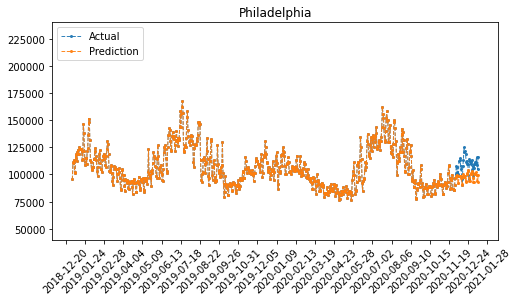

In [67]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(df3['date'], df3['total_load'],label='Actual',lw=1,alpha=0.9,linestyle='dashed',marker='o',markersize=2)
ax.plot(df3['date'], df3['prediction'],label='Prediction',lw=1,alpha=0.9,linestyle='dashed',marker='o',markersize=2)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=35))
#ax.axvline(threshold_date, color=sns_c[3], linestyle='--', label='train test split')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_ylim(40000,240000)
ax.legend(loc='upper left')
ax.set(title='Philadelphia')

In [53]:
df4 = df3[(df3['date'] >= '2020-12-01') & (df3['date'] <= '2021-01-11')]

[Text(0.5, 1.0, 'Philadelphia')]

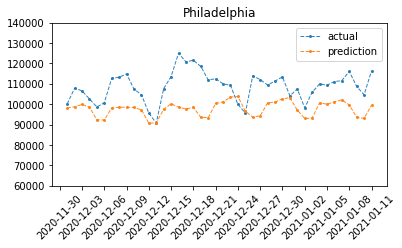

In [68]:
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(df4['date'], df4['total_load'],label='actual',lw=1,alpha=0.9,linestyle='dashed',marker='o',markersize=2)
ax.plot(df4['date'], df4['prediction'],label='prediction',lw=1,alpha=0.9,linestyle='dashed',marker='o',markersize=2)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
#ax.axvline(threshold_date, color=sns_c[3], linestyle='--', label='train test split')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_ylim(60000,140000)
ax.legend(loc='best')
ax.set(title='Philadelphia')